Excercie-1

In [3]:
import cv2
import numpy as np

def apply_function(img):
    img_float = img.astype(np.float32) / 255.0

    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            for c in range(img.shape[2]):
                x = img_float[i, j, c]
                if x <= 0.25:
                    img_float[i, j, c] = 1 - x
                elif x <= 0.5:
                    img_float[i, j, c] = 1
                else:
                    img_float[i, j, c] = x

    img_out = (img_float * 255).astype(np.uint8)
    return img_out

img = cv2.imread('lab07picture.jpeg')

if img is None:
    print("Error: Unable to load image.")
else:
    
    img_out = apply_function(img)

    cv2.imshow('Original Image', img)
    cv2.imshow('Transformed Image', img_out)
    cv2.waitKey(0)
    cv2.destroyAllWindows()


Excercise-2

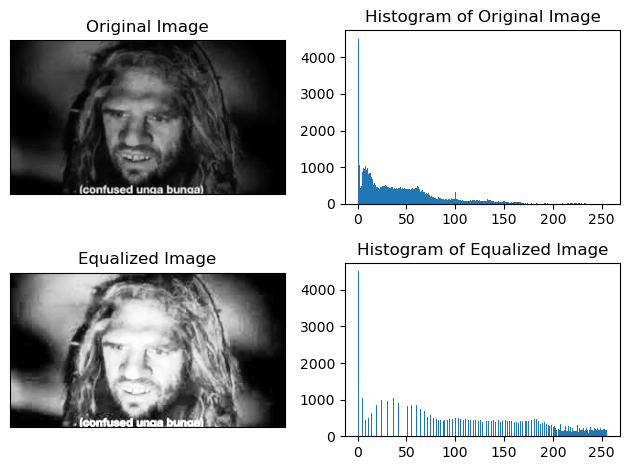

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def myhist_equ(img):

    if len(img.shape) == 3:
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    else:
        gray = img.copy()

   
    hist, bins = np.histogram(gray.flatten(), 256, [0, 256])

    cdf = hist.cumsum()
    cdf_m = np.ma.masked_equal(cdf, 0)
    cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())
    cdf = np.ma.filled(cdf_m, 0).astype('uint8')

    img_eq = cdf[gray]

    plt.subplot(2, 2, 1), plt.imshow(gray, cmap='gray')
    plt.title('Original Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(2, 2, 2), plt.hist(gray.flatten(), 256, [0, 256])
    plt.title('Histogram of Original Image')

    plt.subplot(2, 2, 3), plt.imshow(img_eq, cmap='gray')
    plt.title('Equalized Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(2, 2, 4), plt.hist(img_eq.flatten(), 256, [0, 256])
    plt.title('Histogram of Equalized Image')

    plt.tight_layout()
    plt.show()

img = cv2.imread('lab07picture.jpeg')

if img is None:
    print("Error: Unable to load image.")
else:
    myhist_equ(img)


Excercise-3

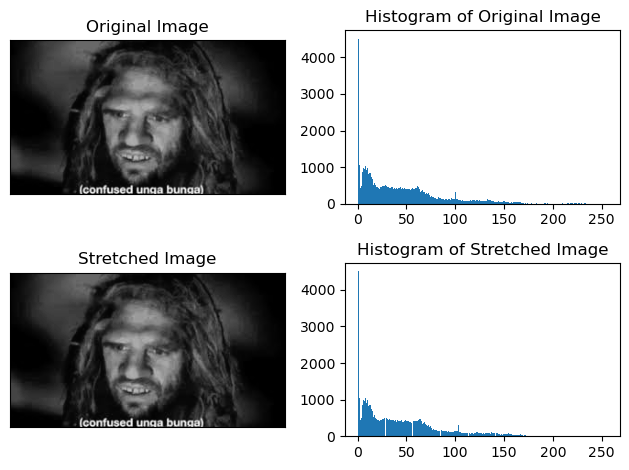

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def contrastStretch(img):
    if len(img.shape) == 3:
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    else:
        gray = img.copy()

    min_val = np.min(gray)
    max_val = np.max(gray)

    if max_val == min_val:
        print("Image has no contrast to stretch.")
        return

    scale = 255 / (max_val - min_val)

    stretched = ((gray - min_val) * scale).astype(np.uint8)

    plt.subplot(2, 2, 1), plt.imshow(gray, cmap='gray')
    plt.title('Original Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(2, 2, 2), plt.hist(gray.flatten(), 256, [0, 256])
    plt.title('Histogram of Original Image')

    plt.subplot(2, 2, 3), plt.imshow(stretched, cmap='gray')
    plt.title('Stretched Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(2, 2, 4), plt.hist(stretched.flatten(), 256, [0, 256])
    plt.title('Histogram of Stretched Image')

    plt.tight_layout()
    plt.show()

img = cv2.imread('lab07picture.jpeg')

if img is None:
    print("Error: Unable to load image.")
else:
    contrastStretch(img)
